<h1><center> Research Methods for Quantitative Professionals </center></h1>

<h2><center> Historical Performance of Assets in Regimes </center></h2>

## Libraries:

In [1]:

## Libraries:import pandas as pd
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from openpyxl import load_workbook 
import seaborn as sns
import warnings 
from IPython.display import Image
from statistics import mean 

from dfply import *

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image , display, Javascript
# from IPython.html.widgets import interact, SelectWidget, CheckboxWidget, RadioButtonsWidget, SelectMultiple
from __future__ import print_function

from ipywidgets.widgets import (interact, interactive, interactive_output, fixed, ToggleButtons,
interact_manual, SelectMultiple, Output, RadioButtons,IntSlider, Dropdown, Layout, Select, HBox, VBox, Checkbox, Button)
#import ipywidgets as widgets

from traitlets import link , dlink

import asyncio
import re


from plotly import plotly


import itertools

from decimal import Decimal

from colour import Color

import mpld3

## Setting the size of the output window:

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
    max-width: 2000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## Function to store values from the widgets:

In [3]:
%gui asyncio

def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        # make the new value available
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    temp = future
    return future

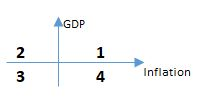

In [4]:
Image(filename='quad.jpg')

## Define a custom color map function:

In [5]:
def my_color_map(val):
    if type(val) == str:
        val = re.sub(r'%', ' ', val) # Remove '%', if any
        color = 'red' if int(val) <= 0 else 'green'
    else:
        color = 'red' if val <= 0 else 'green'
    return 'color: %s' % color

# display(avg_table.style.background_gradient( cmap = "coolwarm_r" , axis = 0 ))

# Collecting Data from excel and trimming it based on the requirement

In [6]:
df_USD = pd.read_excel("Data.xlsx", header = None,sheet_name = 'USD')
df_gold = pd.read_excel("Data.xlsx", header = None,sheet_name = 'gold')
df_equity = pd.read_excel("Data.xlsx", header = None,sheet_name = 'equity')
df_bonds = pd.read_excel("Data.xlsx", header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel("Data.xlsx", header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel("Data.xlsx", header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel("Data.xlsx", header = None,sheet_name = 'CPI')


df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']


####   input below --- till what date you want to trim the data?

Last_date_input = "01OCT2015"

date = datetime.datetime.strptime(Last_date_input, "%d%b%Y")

Last_date = date

index_for_Last_date_testing =0


for i in range(len(df_USD)):
    
    
    if df_USD['Date'][i] ==  Last_date:
        
        index_for_Last_date_testing  = i
        
        break
    
    else:
        continue

        
############## Below dataframes are new dateframes created from orginal dataframes which include entrire data
############## Dataframes are trimmed according to the 'Date' inputed above 

df_USD = df_USD.loc[:index_for_Last_date_testing,:]
df_gold = df_gold.loc[:index_for_Last_date_testing,:]
df_equity = df_equity.loc[:index_for_Last_date_testing,:]
df_bonds = df_bonds.loc[:index_for_Last_date_testing,:]
df_commodities = df_commodities.loc[:index_for_Last_date_testing,:]
df_GDP = df_GDP.loc[:index_for_Last_date_testing,:]
df_CPI = df_CPI.loc[:index_for_Last_date_testing,:]


# Splitting data in the above DataFrames -- to study correlation 

In [7]:
n = 10 # 'n' is number of splits you want in data

num = [ i+1 for i in range(n) ] 

In [8]:
for i in num:
    

    if i != num[-1]:
        
        vars()['dataUSD' + str(i)] = df_USD.iloc[(i-1)*math.floor(len(df_USD)/n):i*math.floor(len(df_USD)/n)]
        vars()['datagold' + str(i)] = df_gold.iloc[(i-1)*math.floor(len(df_gold)/n):i*math.floor(len(df_gold)/n)]
        vars()['dataequity' + str(i)] = df_equity.iloc[(i-1)*math.floor(len(df_equity)/n):i*math.floor(len(df_equity)/n)]
        vars()['databonds' + str(i)] = df_bonds.iloc[(i-1)*math.floor(len(df_bonds)/n):i*math.floor(len(df_bonds)/n)]
        vars()['datacommodities' + str(i)] = df_commodities.iloc[(i-1)*math.floor(len(df_commodities)/n):i*math.floor(len(df_commodities)/n)]
        vars()['dataGDP' + str(i)] = df_GDP.iloc[(i-1)*math.floor(len(df_GDP)/n):i*math.floor(len(df_GDP)/n)] 
        vars()['dataCPI' + str(i)] = df_CPI.iloc[(i-1)*math.floor(len(df_CPI)/n):i*math.floor(len(df_CPI)/n)] 
        
    else:
        
        vars()['dataUSD' + str(i)] = df_USD.iloc[(i-1)*math.floor(len(df_USD)/n):]
        vars()['datagold' + str(i)] = df_gold.iloc[(i-1)*math.floor(len(df_gold)/n):]
        vars()['dataequity' + str(i)] = df_equity.iloc[(i-1)*math.floor(len(df_equity)/n):]
        vars()['databonds' + str(i)] = df_bonds.iloc[(i-1)*math.floor(len(df_bonds)/n):]
        vars()['datacommodities' + str(i)] = df_commodities.iloc[(i-1)*math.floor(len(df_commodities)/n):]
        vars()['dataGDP' + str(i)] = df_GDP.iloc[(i-1)*math.floor(len(df_GDP)/n):] 
        vars()['dataCPI' + str(i)] = df_CPI.iloc[(i-1)*math.floor(len(df_CPI)/n):]
        
    
    vars()['dataUSD_return' + str(i)] = vars()['dataUSD' + str(i)]['price'].pct_change()
    vars()['datagold_return' + str(i)] = vars()['datagold' + str(i)]['price'].pct_change()
    vars()['dataequity_return' + str(i)] = vars()['dataequity' + str(i)]['price'].pct_change()
    vars()['databonds_return' + str(i)] = -vars()['databonds' + str(i)]['price'].pct_change()
    vars()['datacommodities_return' + str(i)] = vars()['datacommodities' + str(i)]['price'].pct_change()
    vars()['dataGDP_return' + str(i)] = vars()['dataGDP' + str(i)]['return'].pct_change()
    vars()['dataCPI_return' + str(i)] = vars()['dataCPI' + str(i)]['return'].pct_change()
    
    
    
    
    vars()['AssetClass'+str(i)] = pd.DataFrame()
    vars()['AssetClass'+str(i)]['Equity'] = vars()['dataequity_return' + str(i)] 
    vars()['AssetClass'+str(i)]['Bonds'] = vars()['databonds_return' + str(i)]
    vars()['AssetClass'+str(i)]['USD'] = vars()['dataUSD_return' + str(i)]
    vars()['AssetClass'+str(i)]['Gold'] = vars()['datagold_return' + str(i)]
    vars()['AssetClass'+str(i)]['commodities']= vars()['datacommodities_return' + str(i)]
    vars()['AssetClass'+str(i)]['GDP'] = vars()['dataGDP_return' + str(i)]
    vars()['AssetClass'+str(i)]['CPI'] = vars()['dataCPI_return' + str(i)]
    
    vars()['AssetClass'+str(i)].dropna(inplace=True)

    vars()['AssetCorrmatrix'+str(i)]=vars()['AssetClass'+str(i)].corr()
    


In [9]:
# type 'AssetCorrmatrix2' -- this will give the correlation matrix if we had 2 splits in the data -- 
# if you have 3 splits then type 3 at end

AssetCorrmatrix2

,Equity,Bonds,USD,Gold,commodities,GDP,CPI
Equity,1.000000,0.456469,-0.302280,-0.325105,0.008882,-0.156794,-0.419605
Bonds,0.456469,1.000000,-0.502053,-0.118363,0.516755,-0.559094,-0.196658
USD,-0.302280,-0.502053,1.000000,-0.274335,-0.654394,-0.041842,-0.552962
Gold,-0.325105,-0.118363,-0.274335,1.000000,0.635226,-0.173003,0.512334
commodities,0.008882,0.516755,-0.654394,0.635226,1.000000,-0.170134,0.427330
GDP,-0.156794,-0.559094,-0.041842,-0.173003,-0.170134,1.000000,0.177559
CPI,-0.419605,-0.196658,-0.552962,0.512334,0.427330,0.177559,1.000000


In [10]:
### for example : equity_bond -- this will give the list of correlations between equity and bond --- 
### correlation in the list are in order --- first element in the list will give you correlation of all the returns \\\
### of bonds and equity that fall into first cluster of data ( after splitting it into 'n' clusters)

equity_bond = []
equity_USD = []
equity_gold = []
equity_commodities = []
bonds_USD = []
bonds_gold =[]
bonds_commodities = []
USD_gold =[]
USD_commodities =[]
gold_commodities = []


for i in num:
    equity_bond.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['Bonds']) 
    equity_USD.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['USD'])
    equity_gold.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['Gold'])
    equity_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['commodities'])
    bonds_USD.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['USD'])
    bonds_gold.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['Gold'])
    bonds_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['commodities'])
    USD_gold.append(vars()['AssetCorrmatrix' + str(i)]['USD']['Gold'])
    USD_commodities.append(vars()['AssetCorrmatrix' + str(i)]['USD']['commodities'])
    gold_commodities.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['commodities'])

In [11]:
correlation = pd.DataFrame()  #shows correlation of different asset classes over different time spans 

In [12]:
correlation['equity_bond'] = equity_bond
correlation['equity_USD'] = equity_USD
correlation['equity_gold'] = equity_gold
correlation['equity_commodities'] = equity_commodities
correlation['bonds_USD'] = bonds_USD
correlation['bonds_gold'] = bonds_gold
correlation['bonds_commodities'] = bonds_commodities
correlation['USD_gold'] = USD_gold
correlation['USD_commodities '] = USD_commodities 
correlation['gold_commodities'] = gold_commodities

In [13]:
correlation   

,equity_bond,equity_USD,equity_gold,equity_commodities,bonds_USD,bonds_gold,bonds_commodities,USD_gold,USD_commodities,gold_commodities
0,0.682897,-0.432370,0.059507,-0.335089,-0.089790,-0.008510,-0.304258,0.451228,-0.477509,-0.816371
1,0.456469,-0.302280,-0.325105,0.008882,-0.502053,-0.118363,0.516755,-0.274335,-0.654394,0.635226
2,-0.522645,0.367548,-0.267876,-0.476849,-0.618678,0.024871,-0.417753,-0.525862,0.113770,0.535009
3,-0.825121,0.400387,-0.319991,0.219876,-0.472020,0.172659,0.037520,-0.745897,-0.085595,0.057888
4,-0.644014,-0.070399,0.320773,-0.115040,0.249655,-0.555537,0.339963,-0.145843,0.321274,0.135005
5,-0.280561,-0.411620,0.393040,-0.555073,0.310992,-0.328805,-0.211255,-0.342054,0.215663,-0.341864
6,-0.454245,-0.326216,0.051915,0.233620,-0.308041,0.621594,-0.257502,-0.795830,-0.647177,0.491431
7,-0.270261,-0.812964,-0.272250,0.678747,0.053351,0.398809,-0.755676,0.258642,-0.611654,-0.412686
8,-0.851151,-0.427457,-0.172057,0.829827,0.627873,0.154661,-0.732629,-0.342184,-0.469562,0.169899
9,-0.444577,-0.146992,-0.049818,0.173597,0.495052,0.256872,-0.534350,-0.413947,-0.602912,0.446680


# Plotting the correlation of assets in each time-span that was split above

In [14]:
# plt.figure(figsize=(30, 30))

# plt.subplot(4,3,1)
# plt.plot(num,equity_bond)
# plt.title('equity and bonds')

# plt.subplot(4,3,2)
# plt.plot(num,equity_USD)
# plt.title('equity and USD')

# plt.subplot(4,3,3)
# plt.plot(num,equity_gold)
# plt.title('equity and gold')

# plt.subplot(4,3,4)
# plt.plot(num,equity_commodities)
# plt.title('equity and commodities')

# plt.subplot(4,3,5)
# plt.plot(num, bonds_USD)
# plt.title('Bonds and USD')

# plt.subplot(4,3,6)
# plt.plot(num, bonds_gold)
# plt.title('Bonds and Gold')

# plt.subplot(4,3,7)
# plt.plot(num, bonds_commodities)
# plt.title('Bonds and Commodities')

# plt.subplot(4,3,8)
# plt.plot(num, USD_gold)
# plt.title('USD and Gold')

# plt.subplot(4,3,9)
# plt.plot(num, USD_commodities )
# plt.title('USD and Commodities')

# plt.subplot(4,3,10)
# plt.plot(num, USD_commodities )
# plt.title('USD and Commodities')

#plt.show()


# below code output will produce heat maps for each split we made in the data 

In [15]:
# # Compute the correlation matrix
# for i in num:
#     corr = vars()['AssetCorrmatrix' + str(i)]
#     sns.set(style = "white")

# # Generate a mask for the upper triangle
#     mask = np.zeros_like(corr, dtype = np.bool)
#     mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
#     f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
#     cmap = sns.diverging_palette(220, 10, as_cmap = True)

# # # Draw the heatmap with the mask and correct aspect ratio
# #     sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, 
# #                 square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

# # Looking at the heatmap, we don't see much correlation among variables, expect for an inverse mpg to engine size, which makes sense

# Creating a DataFrame to observe correlation between each Asset class and GDP, PCE

In [16]:
equity_GDP = []
equity_CPI = []

bonds_GDP = []
bonds_CPI =[]

USD_GDP =[]
USD_CPI =[]

gold_GDP = []
gold_CPI = []

commodities_GDP = []
commodities_CPI = []

GDP_CPI = []



for i in num:
    
    equity_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['GDP']) 
    equity_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Equity']['CPI'])
    
    bonds_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['GDP'])
    bonds_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Bonds']['CPI'])
    
    USD_GDP.append(vars()['AssetCorrmatrix' + str(i)]['USD']['GDP'])
    USD_CPI.append(vars()['AssetCorrmatrix' + str(i)]['USD']['CPI'])
    
    gold_GDP.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['GDP'])
    gold_CPI.append(vars()['AssetCorrmatrix' + str(i)]['Gold']['CPI'])
    
    commodities_GDP.append(vars()['AssetCorrmatrix' + str(i)]['commodities']['GDP'])
    commodities_CPI.append(vars()['AssetCorrmatrix' + str(i)]['commodities']['CPI'])
    
    GDP_CPI.append(vars()['AssetCorrmatrix' + str(i)]['CPI']['GDP'])
    

In [17]:
correlation_Assets_GDP_CPI = pd.DataFrame()

In [18]:
correlation_Assets_GDP_CPI['equity_GDP'] = equity_GDP
correlation_Assets_GDP_CPI['equity_CPI'] = equity_CPI

correlation_Assets_GDP_CPI['bonds_GDP'] = bonds_GDP
correlation_Assets_GDP_CPI['bonds_CPI'] = bonds_CPI

correlation_Assets_GDP_CPI['USD_GDP'] = USD_GDP
correlation_Assets_GDP_CPI['USD_CPI'] = USD_CPI

correlation_Assets_GDP_CPI['gold_GDP'] = gold_GDP
correlation_Assets_GDP_CPI['gold_CPI'] = gold_CPI

correlation_Assets_GDP_CPI['commodities_GDP'] = commodities_GDP
correlation_Assets_GDP_CPI['commodities_CPI'] = commodities_CPI

correlation_Assets_GDP_CPI['GDP_CPI'] = GDP_CPI


In [19]:
correlation_Assets_GDP_CPI

,equity_GDP,equity_CPI,bonds_GDP,bonds_CPI,USD_GDP,USD_CPI,gold_GDP,gold_CPI,commodities_GDP,commodities_CPI,GDP_CPI
0,-0.554265,0.604674,-0.962953,0.069792,-0.074962,-0.291396,-0.014722,0.265482,0.341077,-0.441087,-0.005847
1,-0.156794,-0.419605,-0.559094,-0.196658,-0.041842,-0.552962,-0.173003,0.512334,-0.170134,0.427330,0.177559
2,0.597251,-0.103167,-0.171681,-0.479896,-0.177191,-0.192820,0.142575,0.473870,-0.213984,0.541904,-0.245171
3,-0.152494,0.132246,0.164927,0.166836,0.227840,0.101183,-0.080217,0.055214,0.767503,0.517620,0.408787
4,-0.225092,-0.214933,0.099817,-0.072881,0.375006,0.388151,0.518713,0.037147,0.401734,0.061653,0.101165
5,0.131665,0.408738,-0.603635,-0.604185,0.201473,-0.370706,-0.257470,0.103353,0.246952,0.339454,0.141262
6,0.766054,0.040605,-0.299932,-0.017786,-0.645926,-0.054427,0.439709,0.364035,0.674209,0.443259,0.263368
7,-0.064277,0.673396,0.202700,0.012315,0.328395,-0.571369,-0.506774,-0.213515,-0.341391,0.408156,0.153449
8,0.838252,-0.201305,-0.555557,0.072195,-0.263517,-0.440070,-0.028893,0.731808,0.719098,0.022362,-0.271494
9,0.447269,0.594630,-0.083361,0.228435,0.005550,-0.017054,0.102719,0.045073,0.317652,-0.057843,0.383856


# Plotting the Correlation between Assets - GDP&CPI 

In [20]:

# plt.figure(figsize=(30, 30))

# plt.subplot(4,3,1)
# plt.plot(num,equity_GDP)
# plt.title('equity and GDP')

# plt.subplot(4,3,2)
# plt.plot(num,equity_CPI)
# plt.title('equity and CPI')

# plt.subplot(4,3,3)
# plt.plot(num,bonds_GDP)
# plt.title('Bonds and GDP')

# plt.subplot(4,3,4)
# plt.plot(num,bonds_CPI)
# plt.title('Bonds and CPI')

# plt.subplot(4,3,5)
# plt.plot(num, USD_GDP)
# plt.title('USD and GDP')

# plt.subplot(4,3,6)
# plt.plot(num,USD_CPI)
# plt.title('USD and CPI')

# plt.subplot(4,3,7)
# plt.plot(num, commodities_GDP)
# plt.title('Commodities and GDP')

# plt.subplot(4,3,8)
# plt.plot(num, commodities_CPI)
# plt.title('commodities and CPI')

# plt.subplot(4,3,9)
# plt.plot(num, gold_GDP )
# plt.title('Gold and GDP')

# plt.subplot(4,3,10)
# plt.plot(num, gold_CPI )
# plt.title('gold and CPI')

# plt.subplot(4,3,11)
# plt.plot(num, GDP_CPI )
# plt.title('GDP and CPI')

# plt.show()


In [21]:
#### below list contains change in GDP values quarter on quarter 

delta_change_GDP = [df_GDP['return'][i+1] - df_GDP['return'][i] for i in range(len(df_GDP)-1)]



In [22]:
#### below list contains change in CPI values quarter on quarter 

delta_change_CPI = [df_CPI['return'][i+1] - df_CPI['return'][i] for i in range(len(df_GDP)-1)]


# Plotting values of GDP and Inflation - Data is from 1993 Q1 to 2015 Q4

Text(0,0.5,'GDP in a quarter')

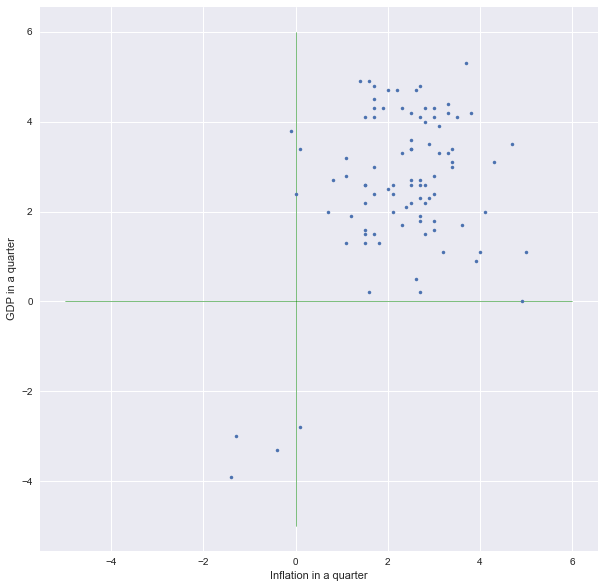

In [23]:
plt.figure(figsize=(10, 10))
plt.plot([0,0],[-5,6], linewidth=0.5, color='green' )
plt.plot([-5,6],[0,0], linewidth=0.5, color='green' )
plt.plot(df_CPI['return'],df_GDP['return'],'.')
plt.xlabel('Inflation in a quarter')
plt.ylabel('GDP in a quarter')

# Plotting change in GDP and Inflation values -  Data is from 1993 Q1 to 2015 Q4

Text(0,0.5,'GDP change quater on quarter')

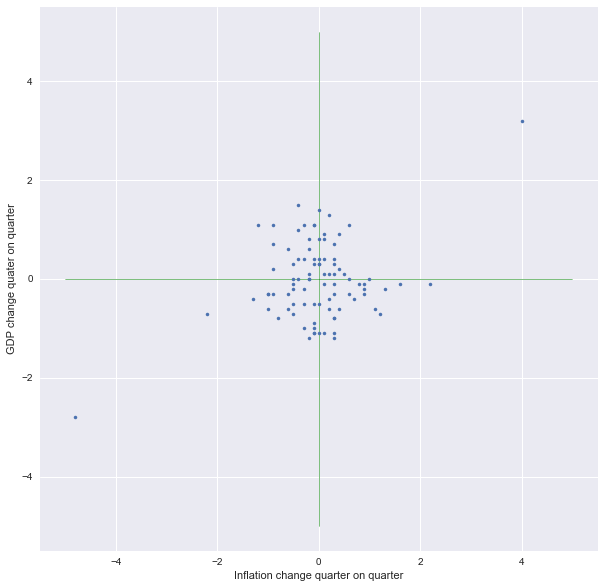

In [24]:
##### How I defined the quadrant
##### Quadrant 1 - Growing GDP(y-axis) & growing inflation(x-axis)
##### Quadrant 2 - Growing GDP(y-axis) & falling inflation(x-axis)
##### Quadrant 3 - Falling is(y-axis) & falling inflation(x-axis)
##### Quadrant 4 - Falling is(y-axis) & growing inflation(x-axis)


plt.figure(figsize=(10, 10))
plt.plot([0,0],[-5,5], linewidth=0.5, color='green' )
plt.plot([-5,5],[0,0], linewidth=0.5, color='green' )
plt.plot(delta_change_CPI,delta_change_GDP,'.')
plt.xlabel('Inflation change quarter on quarter')
plt.ylabel('GDP change quater on quarter')

# Creating a DataFrame - 'data_point' to study the data points collected above 

# Data points here are all the ( delta inflation, delta GDP) points in between 1993 Q1 and 2015 Q4

In [25]:
data_point = pd.DataFrame()
data_point['Date'] = df_GDP['Date'][1:]
data_point['delta_change_CPI'] = delta_change_CPI
data_point['delta_change_GDP'] = delta_change_GDP
data_point['quadrant_number'] = np.zeros(len(delta_change_CPI))


In [26]:
#### for example: 'index_quadrant1' will give us a list of index of all the data points that fall into 1st quadrant  ( index is coming from 'data_point' DataFrame)
#### for example: 'Date_quadrant2' will give us a list of dates of all the data points that fall into 1st quadrant 

Date_quadrant1 = []
index_quadrant1 = []

Date_quadrant2 = []
index_quadrant2 = []

Date_quadrant3 = []
index_quadrant3 = []

Date_quadrant4 = []
index_quadrant4 = []


In [27]:

for i in range(len(delta_change_CPI)):
    
    if data_point.iloc[i,1]>=0 and data_point.iloc[i,2]>=0:
        
        Date_quadrant1.append(data_point['Date'][i+1])
        index_quadrant1.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]>=0:
        Date_quadrant2.append(data_point['Date'][i+1])    
        index_quadrant2.append(i+1)
        
        
    elif data_point.iloc[i,1]<0 and data_point.iloc[i,2]<0:
        Date_quadrant3.append(data_point['Date'][i+1])    
        index_quadrant3.append(i+1)
        
        
    else:
        Date_quadrant4.append(data_point['Date'][i+1])
        index_quadrant4.append(i+1)
        
        
        

In [28]:
for i in index_quadrant1:
    data_point.loc[i,'quadrant_number'] = int(1)

for i in index_quadrant2:
    data_point.loc[i,'quadrant_number'] = int(2)
    
for i in index_quadrant3:
    data_point.loc[i,'quadrant_number'] = int(3)
    
for i in index_quadrant4:
    data_point.loc[i,'quadrant_number'] = int(4)

In [29]:
data_point['previous_quadrant'] = np.zeros(len(data_point))
data_point['next_quadrant'] = np.zeros(len(data_point))

In [30]:
warnings.filterwarnings('ignore') 
data_point['previous_quadrant'][1] = 'data_not_available'
data_point['next_quadrant'][len(data_point)] = 'data_not_available'


In [31]:
warnings.filterwarnings('ignore') 
for i in data_point.index[1:]:
        data_point['previous_quadrant'][i] = data_point['quadrant_number'][i-1]

for i in data_point.index[:-1]:
        data_point['next_quadrant'][i] = data_point['quadrant_number'][i+1]  
                

In [32]:
data_point

,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant
1,1993-Q2,-0.1,-0.5,3.0,data_not_available,3
2,1993-Q3,-0.3,-0.5,3.0,3,1
3,1993-Q4,0.0,0.3,1.0,3,2
4,1994-Q1,-0.2,0.8,2.0,1,1
5,1994-Q2,0.0,0.8,1.0,2,1
6,1994-Q3,0.5,0.1,1.0,1,3
7,1994-Q4,-0.3,-0.2,3.0,1,4
8,1995-Q1,0.2,-0.6,4.0,3,4
9,1995-Q2,0.1,-1.1,4.0,4,2
10,1995-Q3,-0.5,0.3,2.0,4,4


In [33]:
data_point['USD returns'] = df_USD['price'].pct_change()[1:]*100
data_point['gold returns'] = df_gold['price'].pct_change()[1:]*100
data_point['equity returns'] = df_equity['price'].pct_change()[1:]*100
data_point['bonds returns'] = -df_bonds['price'].pct_change()[1:]*100
data_point['commodities returns'] = df_commodities['price'].pct_change()[1:]*100
#data_point


In [34]:
data_point['Year'] = data_point.Date.str.slice(0, 4) ## Extract the year
data_point.head()


,Date,delta_change_CPI,delta_change_GDP,quadrant_number,previous_quadrant,next_quadrant,USD returns,gold returns,equity returns,bonds returns,commodities returns,Year
1,1993-Q2,-0.1,-0.5,3.0,data_not_available,3,1.893981,11.533923,-0.276625,4.116866,-7.467700,1993
2,1993-Q3,-0.3,-0.5,3.0,3,1,-0.843927,-6.003703,1.941748,6.821330,0.788432,1993
3,1993-Q4,0.0,0.3,1.0,3,2,4.330963,9.932470,1.428680,-7.655147,-7.782495,1993
4,1994-Q1,-0.2,0.8,2.0,1,1,-3.903346,0.076785,-4.292417,-16.292717,4.177025,1994
5,1994-Q2,0.0,0.8,1.0,2,1,-3.696540,-1.202046,-0.280308,-8.637578,5.691492,1994


## Create required dictionaries:

In [35]:
## Create dictionary with Assets available: 
asset_dic = ['USD' , 'gold' , 'equity' , 'bonds' , 'commodities']
asset_list = {key: value for (key, value) in zip(asset_dic, asset_dic)}

## Create a Dictionary of all the available timeperiods:
timeframe_dic = list(data_point.Year.unique())
timeframe_list = {key: value for (key, value) in zip(timeframe_dic, timeframe_dic)}


## Based on User Inputs, Select the Assets and Fields:

In [36]:
## Define functions for the widgets:

# Print Asset Selected:
def print_assets(Asset_Class):
    Asset_Class

# Timeframe Selection:
def print_time(Timeframe):
    Timeframe     
    
## Count of instances Selection:
def count_selection(count):
    count 
          
## Correlation view type selection -- Decide whether or not to display values on the correlation matrix:
def corr_selection(corr_vis):
    corr_vis 

    
    
    
#### Define the widgets:

# Asset Widget
assetW = SelectMultiple( options = asset_dic , value = [asset_dic[0]] )

# Timeframe Widget
timeframeW = SelectMultiple( options = timeframe_dic , value = [timeframe_dic[0]])

# Count of instances in quadrant/regime Widget
count_w = Checkbox( value = False , description = 'Include Count of Instances')

# Selection display type from corr_toggle_button Widget
corr_toggle_button = ToggleButtons( options = ['Yes', 'No'],
                                    value = 'No',
                                    description = 'Corr. values:',
                                    disabled = False,
                                    button_style = '', # 'success', 'info', 'warning', 'danger' or ''
                                    tooltips=['Show the correlation values'],
                                    # icons=['check'] * 3 
                                  )

## Calling widget functions:

asset_w_call = interactive( print_assets , Asset_Class = assetW )

timeframe_w_call = interactive( print_time , Timeframe = timeframeW )

count_w_call = interactive ( count_selection , count = count_w )

corr_toggle_call = interactive ( corr_selection , corr_vis = corr_toggle_button )




## Initialize the diplayed values into lists:

asset_w_call_list = [assetW.value]
timeframe_w_call_list = [timeframeW.value]
count_call_list = [count_w.value]
corr_toggle_call_list = [corr_toggle_button.options[1]]

## Functions to store the changes in the widget selections:
        
async def f_asset():
    for i in range(100):

        asset_w_call_val = await wait_for_change(assetW, 'value')
        asset_w_call_list.append(asset_w_call_val)
      
    
async def f_timeframe():
    for i in range(100):

        timeframe_w_call_val = await wait_for_change(timeframeW, 'value')
        timeframe_w_call_list.append(timeframe_w_call_val)
      
    
async def f_count():
    for i in range(100):

        count_call_val = await wait_for_change(count_w, 'value')
        count_call_list.append(count_call_val)
        
        
async def f_corr():
    for i in range(100):

        corr_toggle_call_val = await wait_for_change(corr_toggle_button, 'value')
        corr_toggle_call_list.append(corr_toggle_call_val)
        
        
## Capture the value changes in the widgets: 
asyncio.ensure_future(f_asset())
asyncio.ensure_future(f_timeframe())
asyncio.ensure_future(f_count())
asyncio.ensure_future(f_corr())


<Task pending coro=<f_corr() running at <ipython-input-36-2bcba32fffa0>:86>>

## Widget Container and Display:

In [37]:
## Place the Widgets in a container:
ui = VBox([
           
                    HBox([asset_w_call, timeframe_w_call]),
                     
                    HBox([corr_toggle_button , count_w_call])
          ])
         

## Display the widgets:
ui


## Run the cells below by clicking the following button:

In [95]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = Button(description = "Confirm Selection")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Confirm Selection', style=ButtonStyle())

## Store the user selections into variables:

In [96]:
## Store the selections made by the user:

selected_assets = asset_w_call_list[-1]
selected_timeframe = timeframe_w_call_list[-1]
selected_count = count_call_list[-1]
selected_corr_view = corr_toggle_call_list[-1]

#display(selected_assets, selected_timeframe, selected_count,selected_corr_view )

## Subset based on assets and timeframe:

In [97]:
selected_timeframe_list = list(selected_timeframe)
df_sub = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]

selected_assets_list = list(selected_assets)
selected_assets_list = [ i + ' returns' for i in selected_assets_list]
fields = ['Date' , 'Year' , 'delta_change_CPI' , 'delta_change_GDP'] + selected_assets_list

df_sub  >>= select (fields)
df_sub


,Date,Year,delta_change_CPI,delta_change_GDP,USD returns,gold returns,equity returns,bonds returns,commodities returns
1,1993-Q2,1993,-0.1,-0.5,1.893981,11.533923,-0.276625,4.116866,-7.467700
2,1993-Q3,1993,-0.3,-0.5,-0.843927,-6.003703,1.941748,6.821330,0.788432
3,1993-Q4,1993,0.0,0.3,4.330963,9.932470,1.428680,-7.655147,-7.782495
4,1994-Q1,1994,-0.2,0.8,-3.903346,0.076785,-4.292417,-16.292717,4.177025
5,1994-Q2,1994,0.0,0.8,-3.696540,-1.202046,-0.280308,-8.637578,5.691492
6,1994-Q3,1994,0.5,0.1,-1.941531,2.057986,3.829876,-3.866120,-4.813103
7,1994-Q4,1994,-0.3,-0.2,0.955849,-2.802790,-1.319850,-2.880442,5.449906
8,1995-Q1,1995,0.2,-0.6,-7.687106,2.139875,9.979479,8.003068,-0.939434
9,1995-Q2,1995,0.1,-1.1,-0.390720,-1.737353,8.575038,13.799333,-2.552668
10,1995-Q3,1995,-0.5,0.3,3.321893,-0.156006,7.495639,0.338546,3.778235


## Intuitive Correlation Matrix Plot Function:


In [98]:
## Intuitive Correlation Matrix Plot Funtion:

def my_heatmap( x , y , size , color , field_len , num_show ):
    
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = ( 350 / field_len ) ** 2
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x = x.map(x_to_num), # Use mapping for x
        y = y.map(y_to_num), # Use mapping for y
        s = size.abs() * size_scale, # Vector of square sizes, proportional to size parameter
        c = color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ## Displaying the numerical values:
    
    if num_show == 'Yes':
        
            size_disp = [round(i,2) for i in size]

            for i, txt in enumerate(size_disp):
                ax.annotate(txt , (x.map(x_to_num)[i] , y.map(y_to_num)[i]) , fontsize = 150 / field_len)

       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

## Create a Correlation Matrix based on the 'Returns' Columns for the selected assets:

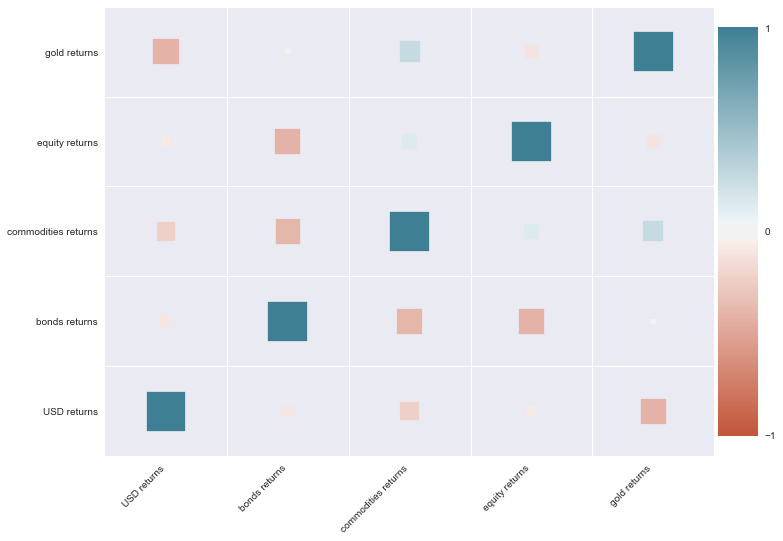

In [99]:
# Selected view type of the correlation matrix:

sns.set(rc={'figure.figsize':(11.7,8.27)})
corr_df = df_sub >> select (selected_assets_list) 
corr_df = corr_df.dropna()
corr_in = corr_df.corr()
corr = pd.melt(corr_in.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

corr_plot_store = my_heatmap(x = corr['x'],
                             y = corr['y'],
                             size = corr['value'],
                             color = corr['value'],
                             field_len = len(fields),
                             num_show = selected_corr_view)


## Chart to track Regime Change over time:

In [100]:
## Plotting the presence in regimes over time:  
plot_subset_list = ['Date' , 'quadrant_number']

df_plot = data_point.loc[data_point['Year'].isin(selected_timeframe_list)]
df_plot >>= select (plot_subset_list) ## Subset the dataframe

q = df_plot['Date']
q = q.tolist()
r = df_plot['quadrant_number']
r = r.tolist()

fig, ax = plt.subplots()

line = plt.plot(q , r , marker = 'o' , linestyle = ':')

plt.xticks(rotation = 60)
ax.grid()
fig.set_size_inches(14 , 3.5)

plt.xlabel('Time'  , labelpad=5, fontsize=10)
plt.ylabel('Regime', labelpad=5, fontsize=10)
plt.title('Regime Changes over Time with GDP and PCE' , fontsize = 18)
plt.yticks([1 , 2 , 3 , 4] , fontsize = 18)
n = 7  # Keeps every 7th label in the x-axis
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.xticks( fontsize = .001)


#plt.show()
#plt.figure(figsize=(25,3))
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip( line[0] , labels = q))
mpld3.display()


## Hierarchical Pie Chart

In [101]:
### Dataframe for quadrant after another, hpie:
## Use the same plotting Dataframe created before:
df_hpie = df_plot.copy()
df_hpie.columns = ['Quarter' , 'Regime_lag_0']
req_history = 10 ## Required history of Regimes. Specify max . number of quarters to go back

# Preparatory:
for i in range(1, req_history + 1):
    curr_col = "Regime_lag_" + str(i)
    prev_col = "Regime_lag_" + str(i-1)
    df_hpie[curr_col] = df_hpie[prev_col].shift(-1)
    
# #df_hpie = df_hpie[df_hpie['Regime_lag_0'] != 'Nil_future'] ## Remove future dates

# #df_hpie = df_hpie.iloc[::-1] ## Reorder the dataframe so that the oldest date is plotted first

lvl_count = 3 ## Specify the numbers of qtrs we want to go back (including current) -- change later to widget input

df_hpie_out = pd.DataFrame() # Initialize an empty dataframe, reqd for the hierarchical pie chart

# # for i in range (1 , lvl_count + 1):

# #     Regime_list = ["Regime_lag_" + str(j) for j in range( 0 , i )] # List of the regimes which fall in this

# #     df_hpie_sub = df_hpie >> select(['Quarter'] + Regime_list)
# #     df_hpie_piv = pd.pivot_table(df_hpie_sub , values = 'Quarter', index = Regime_list , aggfunc = 'count')
# #     df_hpie_piv = df_hpie_piv.reset_index()

# #     df_hpie_piv = df_hpie_piv[df_hpie_piv.columns[::-1]] ## Reverse the order of columns 

# #     df_hpie_list = list(df_hpie_piv.columns[1:]) ## Create a list of the levels
# #     df_hpie_piv = df_hpie_piv.astype(str)

# #     df_hpie_piv['dictionary_key'] = df_hpie_piv[ df_hpie_list ].apply(lambda x: '/'.join(x), axis = 1) 
# #     df_hpie_piv >>= select(X.dictionary_key , X.Quarter)
# #     df_hpie_piv['Quarter'] = pd.to_numeric( df_hpie_piv['Quarter'] )

# #     df_hpie_piv = df_hpie_piv.set_index('dictionary_key')
   
# #     df_test = pd.concat([df_test, df_hpie_piv])
    
    
Regime_list = ["Regime_lag_" + str(j) for j in range( 0 , lvl_count )] # List of the regimes which fall in this

df_hpie_sub = df_hpie >> select(['Quarter'] + Regime_list)
df_hpie_piv = pd.pivot_table(df_hpie_sub , values = 'Quarter', index = Regime_list , aggfunc = 'count')
df_hpie_piv = df_hpie_piv.reset_index()

df_hpie_piv = df_hpie_piv[df_hpie_piv.columns[::-1]] ## Reverse the order of columns 

df_hpie_list = list(df_hpie_piv.columns[1:]) ## Create a list of the levels
df_hpie_piv = df_hpie_piv.astype(str)

df_hpie_piv['dictionary_key'] = df_hpie_piv[ df_hpie_list ].apply(lambda x: '/'.join(x), axis = 1) 
df_hpie_piv >>= select(X.dictionary_key , X.Quarter)
df_hpie_piv['Quarter'] = pd.to_numeric( df_hpie_piv['Quarter'] )

df_hpie_piv = df_hpie_piv.set_index('dictionary_key')

df_hpie_out = pd.concat([df_hpie_out, df_hpie_piv])
  
    
## Convert the dataframe output into a dictionary for input into the HPie Chart:
hpie_dict = df_hpie_out.to_dict()    
hpie_dict = list(hpie_dict.values())
hpie_dict = hpie_dict[0]

#hpie_dict



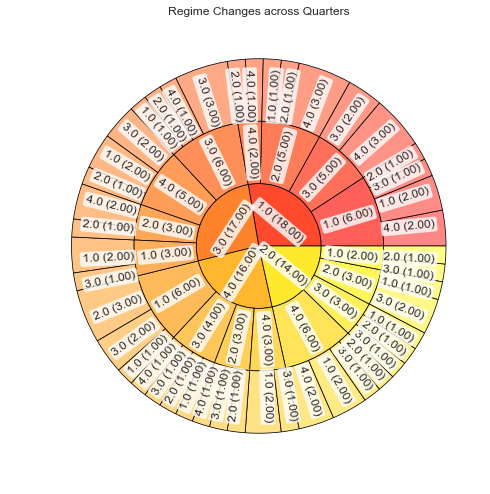

In [102]:
from hpie import HPie, stringvalues_to_pv

fig, ax = plt.subplots()

# # set up some random data
# a = {
#     'ipsum':                      40.45,
#     'ipsum/eirmod':               29.34,
#     'ipsum/eirmod/dolor':         94.4,
#     'lorem':                      36.12,
#     'lorem/sadipscing/dolor':     44.32,
#     'lorem/sadipscing/lorem':     37.15,
#     'lorem/sadipscing/nonumy':    23.98,
#     'lorem/eirmod':               11.12,
#     'lorem/eirmod/lorem':         45.65,
#     'lorem/sadipscing':           79.67,
# }
data = stringvalues_to_pv(hpie_dict)

hp = HPie( data , ax )

# set plot attributes

hp.plot(setup_axes = True )
ax.set_title('Regime Changes across Quarters')

# save/show plot

plt.show()



# Creating a data frame - ' returns_data' 

# returns_data will help you look into the average returns of all the asset classes when they are falling into a particular regime

In [103]:
###### below are the returns of all the data points that fall into a particular quadrant --- 

##### for example --- gold_returns_1 will give all gold returns of all the data points that fall into 1st quadrant

gold_returns_1 = []
bond_returns_1 =[]
equity_returns_1 =[]
USD_returns_1 =[]
commodities_returns_1 =[]

gold_returns_2 = []
bond_returns_2 =[]
equity_returns_2 =[]
USD_returns_2 =[]
commodities_returns_2 =[]

gold_returns_3 = []
bond_returns_3 =[]
equity_returns_3 =[]
USD_returns_3 =[]
commodities_returns_3 =[]
    
gold_returns_4 = []
bond_returns_4 =[]
equity_returns_4 =[]
USD_returns_4 =[]
commodities_returns_4 =[]


for i in index_quadrant1:
    gold_returns_1.append(data_point['gold returns'][i])
    bond_returns_1.append(data_point['bonds returns'][i])
    equity_returns_1.append(data_point['equity returns'][i])
    USD_returns_1.append(data_point['USD returns'][i])
    commodities_returns_1.append(data_point['commodities returns'][i])

    
for i in index_quadrant2:
    gold_returns_2.append(data_point['gold returns'][i])
    bond_returns_2.append(data_point['bonds returns'][i])
    equity_returns_2.append(data_point['equity returns'][i])
    USD_returns_2.append(data_point['USD returns'][i])
    commodities_returns_2.append(data_point['commodities returns'][i])

for i in index_quadrant3:
    gold_returns_3.append(data_point['gold returns'][i])
    bond_returns_3.append(data_point['bonds returns'][i])
    equity_returns_3.append(data_point['equity returns'][i])
    USD_returns_3.append(data_point['USD returns'][i])
    commodities_returns_3.append(data_point['commodities returns'][i])

    
for i in index_quadrant4:
    gold_returns_4.append(data_point['gold returns'][i])
    bond_returns_4.append(data_point['bonds returns'][i])
    equity_returns_4.append(data_point['equity returns'][i])
    USD_returns_4.append(data_point['USD returns'][i])
    commodities_returns_4.append(data_point['commodities returns'][i])

    
####### for example: avg_gold_1 will give us the average of all gold returns that fall into 1st quadrant   

        
avg_gold_1 = mean(gold_returns_1)   
avg_bond_1 = mean(bond_returns_1)   
avg_equity_1 = mean(equity_returns_1)   
avg_USD_1 = mean(USD_returns_1)   
avg_commodities_1 = mean(commodities_returns_1)  

avg_gold_2 = mean(gold_returns_2)   
avg_bond_2 = mean(bond_returns_2)   
avg_equity_2 = mean(equity_returns_2)   
avg_USD_2 = mean(USD_returns_1)   
avg_commodities_2 = mean(commodities_returns_2)  

avg_gold_3 = mean(gold_returns_3)   
avg_bond_3 = mean(bond_returns_3)   
avg_equity_3 = mean(equity_returns_3)   
avg_USD_3 = mean(USD_returns_3)   
avg_commodities_3 = mean(commodities_returns_3)  

avg_gold_4 = mean(gold_returns_4)   
avg_bond_4 = mean(bond_returns_4)   
avg_equity_4 = mean(equity_returns_4)   
avg_USD_4 = mean(USD_returns_4)   
avg_commodities_4 = mean(commodities_returns_4)      

AttributeError: 'list' object has no attribute 'dtype'

In [ ]:

return_data = pd.DataFrame(index=['Quadrant 1','Quadrant 2','Quadrant 3', 'Quadrant 4'])


return_data['average_gold_retuns'] = [ avg_gold_1,avg_gold_2,avg_gold_3,avg_gold_4]
return_data['max gold return'] = [max(gold_returns_1),max(gold_returns_2),max(gold_returns_3),max(gold_returns_4)]
return_data['min gold return'] = [min(gold_returns_1),min(gold_returns_2),min(gold_returns_3),min(gold_returns_4)]
return_data['average_bond_retuns'] = [ avg_bond_1,avg_bond_2,avg_bond_3,avg_bond_4]
return_data['max bond return'] = [max(bond_returns_1),max(bond_returns_2),max(bond_returns_3),max(bond_returns_4)]
return_data['min bond return'] = [min(bond_returns_1),min(bond_returns_2),min(bond_returns_3),min(bond_returns_4)]
return_data['average_equity_retuns'] = [ avg_equity_1,avg_equity_2,avg_equity_3,avg_equity_4]
return_data['max equity return'] = [max(equity_returns_1),max(equity_returns_2),max(equity_returns_3),max(equity_returns_4)]
return_data['min equity return'] = [min(equity_returns_1),min(equity_returns_2),min(equity_returns_3),min(equity_returns_4)]
return_data['average_USD_retuns'] = [ avg_USD_1,avg_USD_2,avg_USD_3,avg_USD_4]
return_data['max USD return'] = [max(USD_returns_1),max(USD_returns_2),max(USD_returns_3),max(USD_returns_4)]
return_data['min USD return'] = [min(USD_returns_1),min(USD_returns_2),min(USD_returns_3),min(USD_returns_4)]
return_data['average_commodities_retuns'] = [ avg_commodities_1,avg_commodities_2,avg_commodities_3,avg_commodities_4]
return_data['max commodities return'] = [max(commodities_returns_1),max(commodities_returns_2),max(commodities_returns_3),max(commodities_returns_4)]
return_data['min commodities return'] = [min(commodities_returns_1),min(commodities_returns_2),min(commodities_returns_3),min(commodities_returns_4)]


return_data

In [ ]:
date_quad_1 =[]
date_quad_2 =[]
date_quad_3 =[]
date_quad_4 =[]

for i in index_quadrant1:
    
    date_quad_1.append(data_point['Date'][i])

for i in index_quadrant2:
    
    date_quad_2.append(data_point['Date'][i])

for i in index_quadrant3:
    
    date_quad_3.append(data_point['Date'][i])
    
for i in index_quadrant4:
    
    date_quad_4.append(data_point['Date'][i])
    
    
quadrant_1_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_1)

quadrant_1_returns['gold'] = gold_returns_1
quadrant_1_returns['bond'] = bond_returns_1
quadrant_1_returns['equity'] = equity_returns_1
quadrant_1_returns['USD'] = USD_returns_1
quadrant_1_returns['commodities'] = commodities_returns_1


quadrant_2_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_2)

quadrant_2_returns['gold'] = gold_returns_2
quadrant_2_returns['bond'] = bond_returns_2
quadrant_2_returns['equity'] = equity_returns_2
quadrant_2_returns['USD'] = USD_returns_2
quadrant_2_returns['commodities'] = commodities_returns_2


quadrant_3_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_3)

quadrant_3_returns['gold'] = gold_returns_3
quadrant_3_returns['bond'] = bond_returns_3
quadrant_3_returns['equity'] = equity_returns_3
quadrant_3_returns['USD'] = USD_returns_3
quadrant_3_returns['commodities'] = commodities_returns_3


quadrant_4_returns = pd.DataFrame(columns=['gold','bond','equity','USD','commodities'], index = date_quad_4)

quadrant_4_returns['gold'] = gold_returns_4
quadrant_4_returns['bond'] = bond_returns_4
quadrant_4_returns['equity'] = equity_returns_4
quadrant_4_returns['USD'] = USD_returns_4
quadrant_4_returns['commodities'] = commodities_returns_4


# quadrant_1_returns
# quadrant_2_returns
# quadrant_3_returns
quadrant_4_returns

# Using 3 Optimisation methods to calculate optimum weights of Asset classes

In [ ]:
##### monte_carlo method for obtaining optimum weights

def monte_carlo_optimization(Data):
    
   
    #calculate the return of the asset classses

    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
    AssetClass.dropna(inplace=True)
   
    
    mean_return=AssetClass.mean()           
   #print("Mean Return of Portfolios")
   #print(mean_return)
   
    
   #covraince matrix
   #print("----------------------------------------------------")
    cov_matrix=AssetClass.cov()                    
   #print("Covariance Matrix of the Portfolios")
   #print(cov_matrix)

    number_port=len(AssetClass.columns)
    V=np.matrix(cov_matrix)
    R=np.matrix(mean_return)
    Rf=0.0013 #Risk-free rate
   
    Port_Std=[]
    Port_MeanReturn=[]
    Sharpe_Ratio=[]
    weight=[]
    
    for i in range(10000):
        
        w = np.random.uniform(0,1,size=number_port)
       #w=np.random.normal(size=number_port)
        w /= w.sum()
        weight.append(w) #portfolio weight
       #Portfolio Standard Deviation
        Port_Var=np.asscalar(w*np.matrix(V)*w.reshape(number_port,1))
        Port_Std.append(np.sqrt(Port_Var))
       #Portfolio Mean Return
        meanReturn=np.asscalar(np.matmul(R,np.matrix(w).transpose()))
        Port_MeanReturn.append(meanReturn)
       #Sharpe Ratio
        Sharpe_Ratio.append((meanReturn-Rf)/np.sqrt(Port_Var))

        num=Sharpe_Ratio.index(max(Sharpe_Ratio)) #the index of the lagest sharpe ratio
        w_tan=weight[num]
    
    print("======================================================")
    print("The weight of the tangency portfolio is")
    print(w_tan)
   
    print("======================================================")
    print("The return of the tangency portfolio is")
    print(Port_MeanReturn[num]*4)
   
    print("======================================================")
    print("The Sharpe ratio of the tangency portfolio is")
    print(max(Sharpe_Ratio))

    fig5=plt.figure()
    ax5=fig5.add_subplot(111)
    ax5.plot(Port_Std,Port_MeanReturn,'.')
    ax5.set_title("minimum-variance frontier")
    ax5.set_xlabel("Standard Deviation")
    ax5.set_ylabel("Return") 
   #ax5.set_xlim([0.018,0.1])
   #ax5.set_ylim([-0.1,0.1])


In [ ]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    monte_carlo_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])    
    

In [ ]:
##### risk parity method for obtaining optimum weights


def risk_parity_optimization(Data):
    
    
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

   

   #create the dataframe of the return of the asset classes
    AssetClass=pd.DataFrame()
    AssetClass['equity']=Equity_return
    AssetClass['bond']=T_return
    AssetClass['USD']=USD_return
    AssetClass['gold']=Gold_return
    AssetClass['commodities']=commodities_return
     

    AssetClass.dropna(inplace=True)

    cov_matrix=AssetClass.cov() 
    V=np.matrix(cov_matrix)

    # risk budgeting optimization
    def calculate_portfolio_var(w,V):
        # function that calculates portfolio risk
        w = np.matrix(w)
        return (w*V*w.T)[0,0]

    def calculate_risk_contribution(w,V):
        # function that calculates asset contribution to total risk
        w = np.matrix(w)
        sigma = np.sqrt(calculate_portfolio_var(w,V))
        # Marginal Risk Contribution
        MRC = V*w.T
        # Risk Contribution
        RC = np.multiply(MRC,w.T)/sigma
        return RC

    def risk_budget_objective(x,pars):
        # calculate portfolio risk
        V = pars[0]# covariance table
        x_t = pars[1] # risk target in percent of portfolio risk
        sig_p =  np.sqrt(calculate_portfolio_var(x,V)) # portfolio sigma
        risk_target = np.asmatrix(np.multiply(sig_p,x_t))
        asset_RC = calculate_risk_contribution(x,V)
        J = sum(np.square(asset_RC-risk_target.T))[0,0]*1000 # sum of squared error
        return J

    def total_weight_constraint(x):
        return np.sum(x)-1.0

    def long_only_constraint(x):
        return x

    x_t = [0.2, 0.2, 0.2, 0.2,0.2] # your risk budget percent of total portfolio risk (equal risk)
    w0 = [0.2,0.2,0.2,0.2,0.2] 
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
    {'type': 'ineq', 'fun': long_only_constraint})
    res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True})
    w_rb = np.asmatrix(res.x)

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn = np.mean(commodities_return)

    #return of the portfolio
    R=USD_MeanReturn*res.x[0]+Gold_MeanReturn*res.x[1]+Equity_MeanReturn*res.x[2]+T_MeanReturn*res.x[3]+commodities_meanreturn*res.x[4]
    print("Aunnual Return of the portfolio is",R*4)

    print(w_rb)




In [ ]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    risk_parity_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])

In [ ]:
##### inverse vol method for obtaining optimum weights


def inverse_vol_optimization(Data):
    
    USD_return=Data['USD']
    Gold_return=Data['gold']
    Equity_return=Data['equity']
    T_return=Data['bond']
    commodities_return=Data['commodities'] 

    
    #volatility of each asset
    
    Equity_vol=np.std(Equity_return)
    USD_vol=np.std(USD_return)
    T_vol=np.std(T_return)
    Gold_vol=np.std(Gold_return)
    commodities_vol=np.std(commodities_return)
    
    vol=np.array([Equity_vol,USD_vol,T_vol,Gold_vol,commodities_vol])

    #inverse the vol
    inverse_vol=1/vol
    sum_vol=np.sum(inverse_vol)
    #the portfolio weight
    port_weight=inverse_vol/sum_vol

    #to test whether the sum of the weight is equal to 1
    if np.sum(port_weight)==1:
        print('True')

    #caculate the mean return of the asset classes
    USD_MeanReturn=np.mean(USD_return)
    Gold_MeanReturn=np.mean(Gold_return)
    Equity_MeanReturn=np.mean(Equity_return)
    T_MeanReturn=np.mean(T_return)
    commodities_meanreturn=np.mean(commodities_return)
    

    #return of the portfolio
    R=commodities_meanreturn*port_weight[-1]+USD_MeanReturn*port_weight[1]+Gold_MeanReturn*port_weight[3]+Equity_MeanReturn*port_weight[0]+T_MeanReturn*port_weight[2]
   
    print("Aunnual Return of the portfolio is",R*4)

    print(port_weight)



In [ ]:
##### below for loop will output results in order --- results from quadrant 1 to quadrant 4

for i in range(4):
    
    inverse_vol_optimization(vars()['quadrant_'+ str(i+1)+'_returns'])

# Below plots will help you observe how the asset class returns are changing when they are in a particular regime

In [ ]:
#### quarter 1 returns graph  for all assets

plt.figure(figsize=(60, 60))

plt.subplot(3,2,1)
plt.plot(gold_returns_1)
plt.title('Gold returns in quadrant 1')

plt.subplot(3,2,2)
plt.plot(bond_returns_1)
plt.title('Bond returns in quadrant 1')

plt.subplot(3,2,3)
plt.plot(equity_returns_1)
plt.title('equity returns in quadrant 1')

plt.subplot(3,2,4)
plt.plot(USD_returns_1)
plt.title('USD returns in quadrant 1')

plt.subplot(3,2,5)
plt.plot(commodities_returns_1)
plt.title('commodities returns in quadrant 1')



In [ ]:
#### quarter 2 returns graph  for all assets

plt.figure(figsize=(40, 40))

plt.subplot(3,2,1)
plt.plot(gold_returns_2)
plt.title('Gold returns in quadrant 2')

plt.subplot(3,2,2)
plt.plot(bond_returns_2)
plt.title('Bond returns in quadrant 2')

plt.subplot(3,2,3)
plt.plot(equity_returns_2)
plt.title('equity returns in quadrant 2')

plt.subplot(3,2,4)
plt.plot(USD_returns_2)
plt.title('USD returns in quadrant 2')

plt.subplot(3,2,5)
plt.plot(commodities_returns_2)
plt.title('commodities returns in quadrant 2')


In [ ]:
#### quarter 3 returns graph  for all assets

plt.figure(figsize=(40, 40))

plt.subplot(3,2,1)
plt.plot(gold_returns_3)
plt.title('Gold returns in quadrant 3')

plt.subplot(3,2,2)
plt.plot(bond_returns_3)
plt.title('Bond returns in quadrant 3')

plt.subplot(3,2,3)
plt.plot(equity_returns_3)
plt.title('equity returns in quadrant 3')

plt.subplot(3,2,4)
plt.plot(USD_returns_3)
plt.title('USD returns in quadrant 3')

plt.subplot(3,2,5)
plt.plot(commodities_returns_3)
plt.title('commodities returns in quadrant 3')


In [ ]:
#### quarter 4 returns graph  for all assets

plt.figure(figsize=(40, 40))

plt.subplot(3,2,1)
plt.plot(gold_returns_4)
plt.title('Gold returns in quadrant 4')

plt.subplot(3,2,2)
plt.plot(bond_returns_4)
plt.title('Bond returns in quadrant 4')

plt.subplot(3,2,3)
plt.plot(equity_returns_4)
plt.title('equity returns in quadrant 4')

plt.subplot(3,2,4)
plt.plot(USD_returns_4)
plt.title('USD returns in quadrant 4')

plt.subplot(3,2,5)
plt.plot(commodities_returns_4)
plt.title('commodities returns in quadrant 4')


In [ ]:
mom = ['1_1','2_1','3_1','4_1', '1_2','2_2','3_2','4_2', '1_3','2_3','3_3','4_3', '1_4','2_4','3_4','4_4']

##### index_i_j ---- this is the list of all the index of data points in 'data_point' DataFrame ---
##### 'i' is from what quadrant you are coming from  ---- 'j' is your current quadrant

for i in mom:
    vars()['index_'+ i] = []
        
for i in index_quadrant1:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_1.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_1.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_1.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_1.append(i)
        
        
for i in index_quadrant2:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_2.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_2.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_2.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_2.append(i)    
        
for i in index_quadrant3:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_3.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_3.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_3.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_3.append(i)        
        
for i in index_quadrant4:
   
    if data_point['previous_quadrant'][i]== 1:
        index_1_4.append(i)
        
    elif data_point['previous_quadrant'][i]== 2:
        index_2_4.append(i)
    
    elif data_point['previous_quadrant'][i]== 3:
        index_3_4.append(i) 
        
    elif data_point['previous_quadrant'][i]== 4:
        index_4_4.append(i)        
            

In [ ]:
#### below data frame gives average return of each asset for a particular type of regime change

momentum_df = pd.DataFrame(index = mom, columns = ['gold', 'equity', 'bonds', 'commodities','USD'])

for p in mom:
    
    L = vars()['index_'+ p]
    
    momentum_df['gold'][p] = mean([data_point['gold returns'][i] for i in L])
    momentum_df['equity'][p] = mean([ data_point['equity returns'][i] for i in L ])
    momentum_df['bonds'][p] = mean([ data_point['bonds returns'][i] for i in L ]) 
    momentum_df['USD'][p] = mean([ data_point['USD returns'][i] for i in L ]) 
    momentum_df['commodities'][p] = mean( [ data_point['commodities returns'][i] for i in L])     

In [ ]:
momentum_df   

In [ ]:
### Dataframe for quadrant after another, hpie: 

## Use the same plotting Dataframe created before: 


from dfply import * 

from IPython.display import Image , display, Javascript 

plot_subset_list = ['Date','quadrant_number']
df_hpie = data_point >> select( plot_subset_list ) 

df_hpie.columns = ['Quarter' , 'Regime_0'] 

req_history = 10 ## Required history of Regimes. Specify number of quarters to go back 

 

for i in range(1, req_history + 1): 

    curr_col = "Regime_" + str(i) 

    prev_col = "Regime_" + str(i-1) 

    df_hpie[curr_col] = df_hpie[prev_col].shift(-1) 

     
    
# df_hpie = df_hpie[df_hpie['Regime_0'] != 'Nil_future'] ## Remove future dates 

 

df_hpie = df_hpie.iloc[::-1] ## Reorder the dataframe so that the oldest date is plotted first 

 
lvl_count = 2

Regime_list = ["Regime_" + str(lvl_count-i) for i in range( 0 , lvl_count )] 


df_hpie_sub = df_hpie >> select(['Quarter'] + Regime_list) 

df_hpie_piv = pd.pivot_table(df_hpie_sub , values = 'Quarter', index = Regime_list , aggfunc = 'count') 

df_hpie_piv = df_hpie_piv.reset_index() 

 
df_hpie_piv1 =  df_hpie_piv[df_hpie_piv.columns[::-1]] ## Reverse the order of columns  


display(df_hpie_piv1)  

# Data required for Validation - 2016 Q1 to 2018 Q4

In [ ]:
df_USD = pd.read_excel("Data.xlsx", header = None,sheet_name = 'USD')
df_gold = pd.read_excel("Data.xlsx", header = None,sheet_name = 'gold')
df_equity = pd.read_excel("Data.xlsx", header = None,sheet_name = 'equity')
df_bonds = pd.read_excel("Data.xlsx", header = None,sheet_name = 'bonds')
df_commodities = pd.read_excel("Data.xlsx", header = None,sheet_name = 'commodities')
df_GDP = pd.read_excel("Data.xlsx", header = None,sheet_name = 'GDP')
df_CPI = pd.read_excel("Data.xlsx", header = None,sheet_name = 'CPI')


df_USD.columns = ['Date','price']
df_gold.columns = ['Date','price']
df_equity.columns = ['Date','price']
df_bonds.columns = ['Date','price']
df_commodities.columns = ['Date','price']
df_GDP.columns = ['Date','return']
df_CPI.columns = ['Date','return']


Last_date = '2015-10-01 00:00:00'

index_for_Last_date_testing = 91


df_USD_validation = df_USD.loc[index_for_Last_date_testing+1:,:]
df_gold_validation = df_gold.loc[index_for_Last_date_testing+1:,:]
df_equity_validation = df_equity.loc[index_for_Last_date_testing+1:,:]
df_bonds_validation = df_bonds.loc[index_for_Last_date_testing+1:,:]
df_commodities_validation = df_commodities.loc[index_for_Last_date_testing+1:,:]
df_GDP_validation = df_GDP.loc[index_for_Last_date_testing+1:,:]
df_CPI_validation = df_CPI.loc[index_for_Last_date_testing+1:,:]


df_CPI_validation